# Task 1: data explores, cleans, and generates new features
#Task 2: test and optimization of random forest

In [146]:
#Loading the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

#Importing data
df_credit = pd.read_csv("/Users/Jici/Desktop/german_credit_data.csv")

#check dataframe
#delete missing values
#delete extream values -> plt.hist()

   Unnamed: 0  Age     Sex  Job Housing Saving accounts Checking account  \
1           1   22  female    2     own          little         moderate   
3           3   45    male    2    free          little           little   
4           4   53    male    2    free          little           little   
7           7   35    male    3    rent          little         moderate   
9           9   28    male    3     own          little         moderate   

   Credit amount  Duration              Purpose  Risk  
1           5951        48             radio/TV   bad  
3           7882        42  furniture/equipment  good  
4           4870        24                  car   bad  
7           6948        36                  car  good  
9           5234        30                  car   bad  


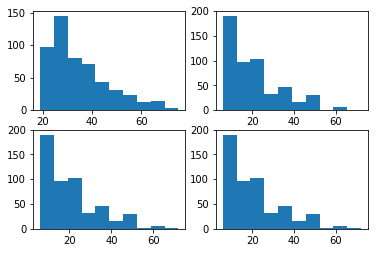

In [102]:
#df_credit.info()
#df_credit.nunique()
#df_credit.head()
#df_credit.describe()

df_credit = df_credit.dropna() #drop nan
print( df_credit.head())

fig = plt.figure()

plt.subplot(2, 2, 1)
plt.hist(df_credit['Age'], label = ['Age'])

plt.subplot(2, 2, 2)
plt.hist(df_credit['Duration'])

plt.subplot(2, 2, 3)
plt.hist(df_credit['Duration'])

plt.subplot(2, 2, 4)
plt.hist(df_credit['Duration'])

plt.show()




##Data descriptions

Risk    bad  good
Sex              
female   82    86
male    149   205
Risk  bad  good
Job            
0       6     8
1      45    71
2     143   170
3      37    42
Risk     bad  good
Housing           
free      36    29
own      139   210
rent      56    52
Risk             bad  good
Saving accounts           
little           191   221
moderate          30    34
quite rich         6    17
rich               4    19
Risk              bad  good
Checking account           
little            121   124
moderate           98   126
rich               12    41
Risk                 bad  good
Purpose                       
business              24    29
car                   80    93
domestic appliances    3     3
education             18    10
furniture/equipment   45    62
radio/TV              51    81
repairs                6     8
vacation/others        4     5


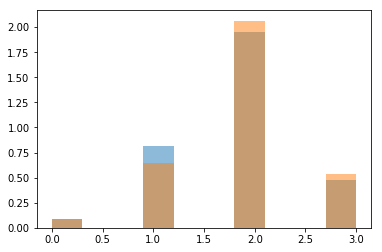

"\nplt.scatter(df_credit['Age'], df_credit['Job'])\nplt.xlable = ['Age']\nplt.ylable = ['Job']\nplt.show()\n"

In [110]:
#Categorical -> crosstab, 
print(pd.crosstab(df_credit.Sex, df_credit.Risk))
print(pd.crosstab(df_credit.Job, df_credit.Risk))
print(pd.crosstab(df_credit.Housing, df_credit.Risk))
print(pd.crosstab(df_credit['Saving accounts'], df_credit.Risk))
print(pd.crosstab(df_credit['Checking account'], df_credit.Risk))
print(pd.crosstab(df_credit['Purpose'], df_credit.Risk))

df_credit.corr()
#g = sns.distplot(df_credit['Age'], fit = stats.laplace, kde = True)
#g.set_xlabel("Duration Distribuition")
#g.set_ylabel("Count")
#g.set_title("Duration Count")

df_good = df_credit[df_credit['Risk'] =='good']
df_bad = df_credit[df_credit['Risk'] == 'bad']




"""
plt.scatter(x = df_credit['Age'], y = df_credit['Credit amount'] )
plt.xlable = ['Age']
plt.ylable = ['Job']
plt.show()
"""


plt.hist(df_good['Job'], bins=10, normed = 1, alpha = 0.5)
plt.hist(df_bad['Job'], bins=10, normed = 1, alpha = 0.5)
plt.xlable = ['Age']
plt.ylable = ['Job']
plt.show()
#plt.boxplot(df_credit[['Age', 'Risk']])

plt.show()

"""
plt.scatter(df_credit['Age'], df_credit['Job'])
plt.xlable = ['Age']
plt.ylable = ['Job']
plt.show()
"""



In [117]:
#Loading the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

#Importing data
app_data = pd.read_csv("/Users/Jici/Desktop/app_data.csv")
cd_data = pd.read_csv("/Users/Jici/Desktop/cb_data.csv")

In [122]:
#app_data.head()
#cd_data.head()
data = pd.merge(app_data, cd_data, on = ['id'], how = 'outer')

In [145]:
cd_data.dropna().count()
data[data['cnt_posit_tot_over']>0].count()
data[data['CAR'] == 'Y'].count()
data['INCOME'].mean()
data.corr()

,id,INCOME,default_flag,cnt_posit_tot_over
id,1.000000,0.026458,-0.030208,-0.023951
INCOME,0.026458,1.000000,-0.007222,0.004098
default_flag,-0.030208,-0.007222,1.000000,-0.041801
cnt_posit_tot_over,-0.023951,0.004098,-0.041801,1.000000


In [151]:
#Linear regression
regression = pd.read_csv("/Users/Jici/Desktop/dataframes/reg_sample.csv")

regression_X = regression['Pass']
plt.scatter(regression['Hour'], regression['Pass'])


KeyError: 'Hour'

In [148]:
regression.head()

,Hours,Pass
0,0.50,0
1,0.75,0
2,1.00,0
3,1.25,0
4,1.50,0


In [ ]:

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(diabetes_y_test, diabetes_y_pred))

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

